In [89]:
import pandas as pd
import quandl,datetime
import math
import numpy as np
from sklearn import preprocessing, svm #scale, regresions, cross shuffle stats sepeareate data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from matplotlib import style

In [90]:
# https://github.com/anyaozm/SVM-Stock-Prediction/blob/master/ISBANK_SVM.ipynb


def run_single(data_csv):
    df = pd.read_csv(data_csv, parse_dates=True, index_col=0)
    df = df.dropna()

    df["High_Low_per"] = (df["High"] - df["Close"]) / df["Close"] * 100
    df["Per_change"] = (df["Open"] - df["Open"]) / df["Close"] * 100
    df = df[["Adj Close", "High_Low_per", "Per_change", "Volume"]]
    label_col = "Adj Close"
    forecast_ceil = int(math.ceil(0.35 * len(df)))
    df2 = df.copy()
    df2["label"] = df2[label_col]
    print(df2.__len__())
    
    df["label"] = df[label_col].shift(-forecast_ceil)


    # feaures X, labels Y
    X = np.array(df.drop(["label"], 1))
    X = preprocessing.scale(X)
    
    X = X[:-forecast_ceil:]
    print("X len", X.__len__())
    X_lately = X[-forecast_ceil:]
    print("X_lately len", X_lately.__len__())

    df.dropna(inplace=True)
    y = np.array(df["label"])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = svm.SVR(kernel="rbf")
    clf.fit(X_train, y_train) 
    accuracy = clf.score(X_test, y_test)
    print(y_test.shape, X_test.shape)

    print(accuracy)

    # forecast_set = clf.predict(X_lately)

    # # 2. Integrate Predictions into DataFrame
    # df['Forecast'] = np.nan
    # last_date = df.index[-1]

    # for i in forecast_set:
    #     last_date += pd.Timedelta(days=1)
    #     df.loc[last_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

    # # 3. Plotting
    # plt.figure(figsize=(10,6))
    # plt.plot(df.index, df2['Adj Close'], label='Adj Close')
    # plt.plot(df.index, df['Adj Close'], label='Adj Close')
    # plt.plot(df.index, df['Forecast'], label='Forecast')
    # plt.legend(loc=4)
    # plt.xlabel('Date')
    # plt.ylabel('Price')
    # plt.title('AAPL Stock Price Prediction using SVM')
    # plt.show()



    forecast_set = clf.predict(X_lately)

    # 2. Integrate Predictions into DataFrame
    df["Forecast"] = np.nan
    df2["Forecast"] = np.nan
    last_index = len(df) - 1
    # print(last_index)
    for i, forecast in enumerate(forecast_set):
        # print(last_index + i)
        # df["Forecast"][last_index + i] = forecast
        df2["Forecast"][last_index + i] = forecast
    
    # for i, forecast in enumerate(forecast_set):
    #     # print(last_index + i)
    #     df["Forecast"][last_index + i] = forecast

    # # 3. Plotting
    # # plt.figure(figsize=(10, 6))
    # # df2["Adj Close"].plot()
    # # df["Adj Close"].plot()
    # # df["Forecast"].plot()
    # # print(df.head())
    # # plt.legend(loc=4)
    # # # use index as x, not date
    

    # # plt.ylabel("Price")
    # # plt.show()

    from matplotlib.pyplot import figure
    figure(num=None, figsize=(15, 10), dpi=150)
    df2['Adj Close'].plot()
    df['Adj Close'].plot()
    df2['Forecast'].plot()

    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('AAPL Stock Price Prediction using SVM')
    # plt.show()

3749
X len 2436
X_lately len 1313
(488,) (488, 4)
0.7684686893024623


/var/folders/gx/j0snwyqn015d2ms_6k_qbspc0000gn/T/ipykernel_11555/126894317.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(["label"], 1))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


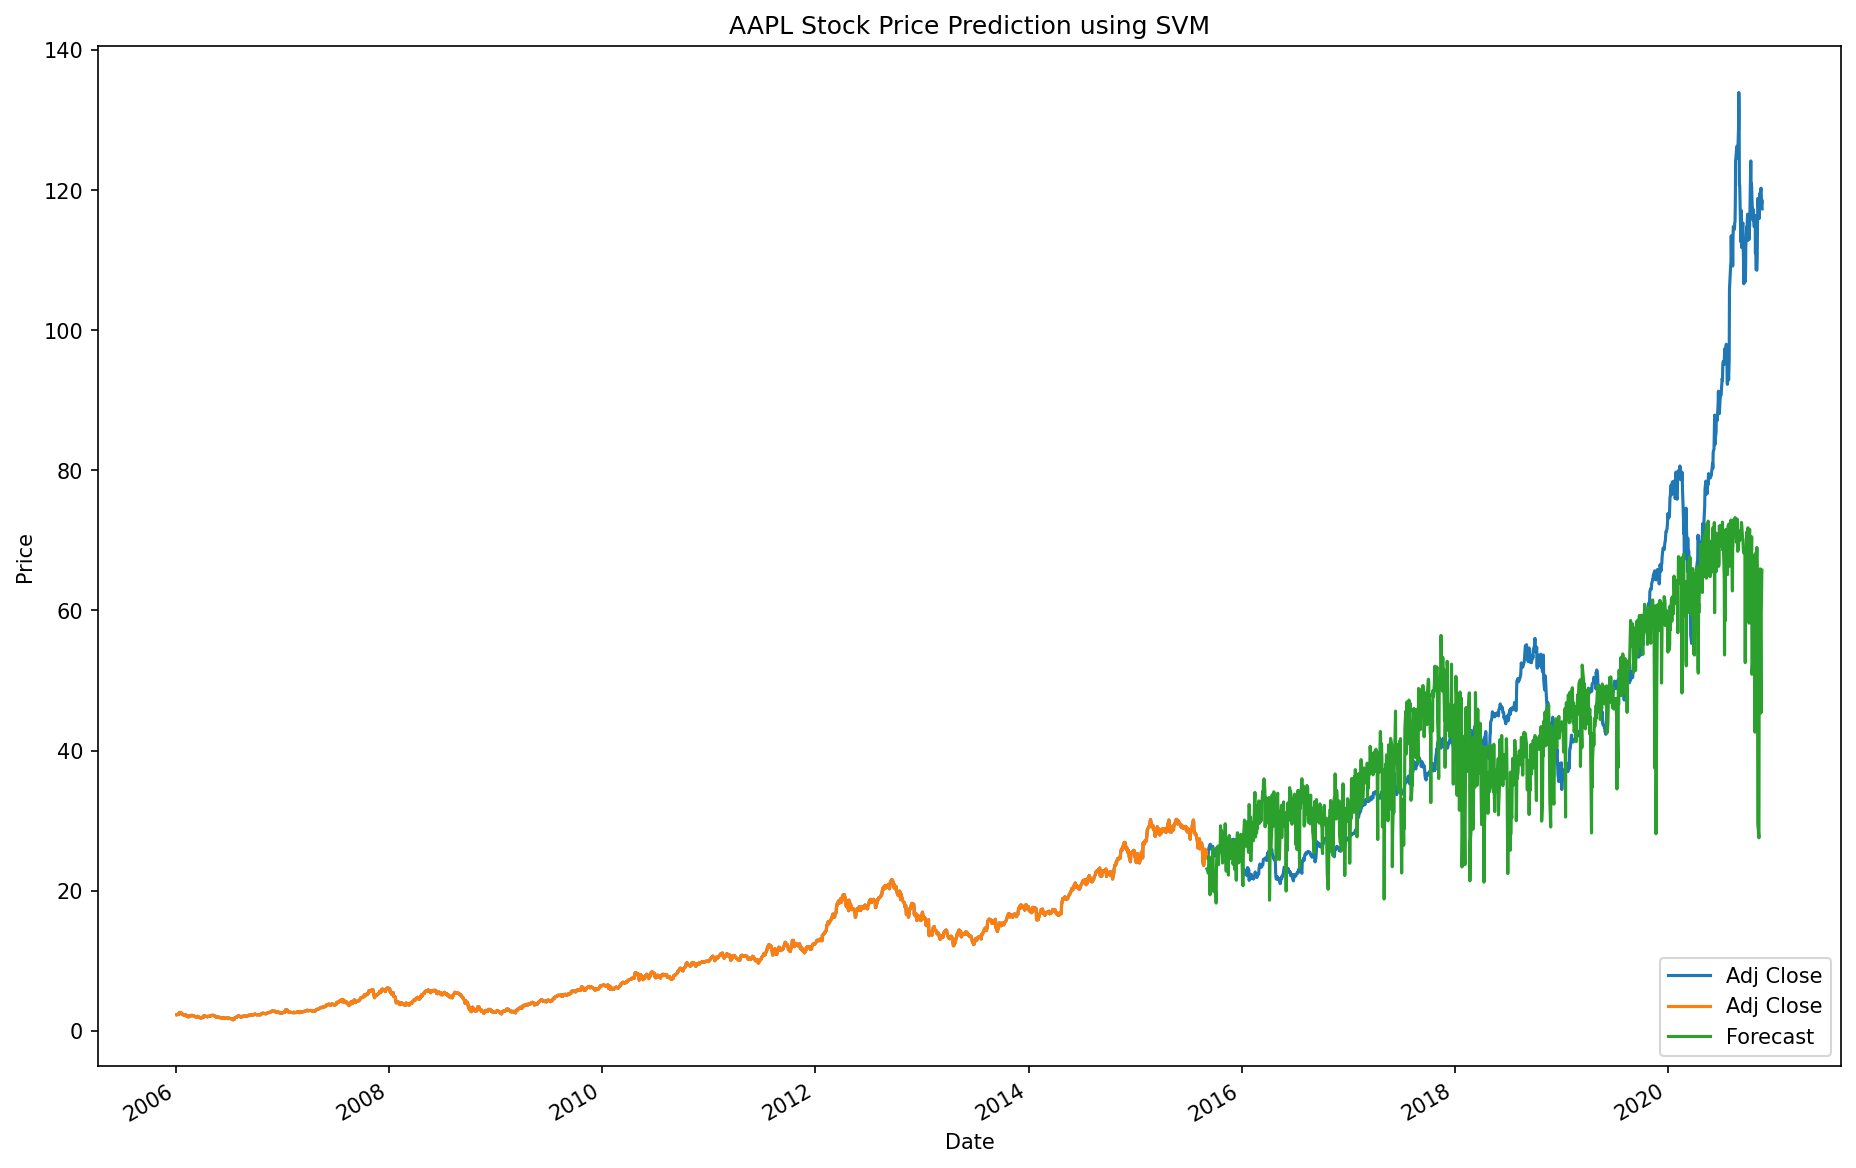

In [91]:
BASE_PATH = 'archive/Technology Companies/'

run_single(BASE_PATH + 'AAPL.csv')